In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("S&P500.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


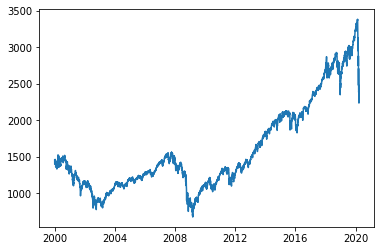

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values("Date",inplace=True)
plt.plot(df['Date'],df['Adj Close'])

In [96]:
recession_rate = 0.15
def recession(df, recession_rate):
    recessions = list()
    days = df.shape[0]
    for i in range(0,days):
        for j in range(i+1,days):
            if df.loc[j,'Adj Close'] <= df.loc[i,'Adj Close']*(1-recession_rate):
                temp = df.loc[i:j,:]
                max_index = temp[temp['Adj Close'] == temp['Adj Close'].max()].index[-1]
                if ((df.loc[max_index,'Date'],df.loc[j,'Date']) not in recessions):
                    recessions.append((df.loc[max_index,'Date'],df.loc[j,'Date']))
                    if max_index>j:
                        raise ValueError
                break
    rec = list()
    for i in range(len(recessions)-1):
        if len(rec)==0:
            if recessions[i][1] >= recessions[i+1][0]:
                if recessions[i][1]<=recessions[i+1][1]:
                    rec.append((recessions[i][0],recessions[i+1][1]))
                elif recessions[i][1]>=recessions[i+1][1]:
                    rec.append((recessions[i][0],recessions[i][1]))
        else:
            if recessions[i][0] <= rec[-1][1]:
                if rec[-1][1]<=recessions[i+1][1]:
                    rec[-1]=(rec[-1][0], recessions[i][1])
            else:
                rec.append(recessions[i])
                
    rec_periods = list()
    timediff = pd.Timedelta(days=120)
    for i in range(len(rec)):
        if i == 0:
            rec_periods.append(rec[0])
        elif rec[i][0] - rec_periods[-1][1] <= timediff:
            rec_periods[-1] = (rec_periods[-1][0],rec[i][1])
        else:
            rec_periods.append(rec[i])
    return rec_periods
rec_periods = recession(df, recession_rate)

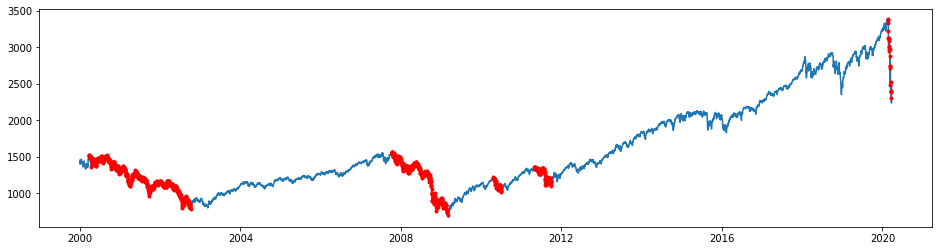

In [97]:
rec_index = list()
for (x, y) in rec_periods:
    rec_index.extend([z for z in range(df[df['Date'] == x].index[0],df[df['Date'] == y].index[0]+1)])
plt.figure(figsize=(16,4))
plt.plot(df['Date'],df['Adj Close'], marker='o', markerfacecolor='r',markeredgecolor='r', markersize=3 ,markevery=rec_index)

In [125]:
def recovery(df,reccessions = rec_periods, recovery_rate = 0.15):
    recs = list()
    for i in range(len(rec_periods)):
        bottom = df[df['Date'] == rec_periods[i][1]].index[0]
        if i<len(rec_periods)-1:        
            end = df[df['Date'] == rec_periods[i+1][0]].index[0]
        else:
            end = df.shape[0]-1
        for j in range(bottom, end):
            if df.loc[j, 'Adj Close'] >= df.loc[bottom, 'Adj Close']*(1+recovery_rate):
                end = j
                break  
        recs.append((rec_periods[i][0], df.loc[end, 'Date']))
    return recs
recoveries = recovery(df,reccessions = rec_periods, recovery_rate = 0.20)

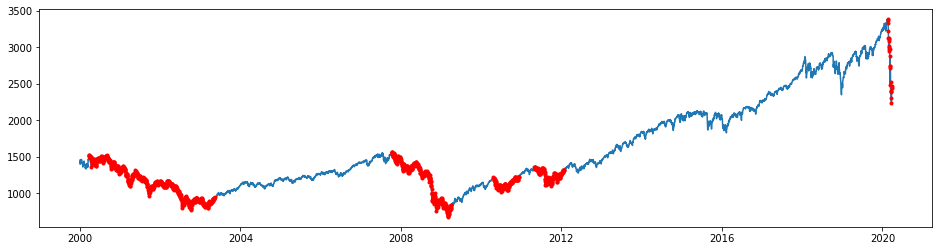

In [126]:
rec_index = list()
for (x, y) in recoveries:
    rec_index.extend([z for z in range(df[df['Date'] == x].index[0],df[df['Date'] == y].index[0]+1)])
plt.figure(figsize=(16,4))
plt.plot(df['Date'],df['Adj Close'], marker='o', markerfacecolor='r',markeredgecolor='r', markersize=3 ,markevery=rec_index)

In [129]:
recoveries

[(Timestamp('2000-03-24 00:00:00'), Timestamp('2003-05-12 00:00:00')),
 (Timestamp('2007-10-09 00:00:00'), Timestamp('2009-04-03 00:00:00')),
 (Timestamp('2010-04-23 00:00:00'), Timestamp('2010-12-08 00:00:00')),
 (Timestamp('2011-04-29 00:00:00'), Timestamp('2012-01-25 00:00:00')),
 (Timestamp('2020-02-19 00:00:00'), Timestamp('2020-03-25 00:00:00'))]